In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import math
from scipy.optimize import curve_fit
import numpy as np

mlt.rcParams['figure.figsize'] = [12, 12]

In [2]:
df = pd.read_json("./results_fixed.json")

/tmp/ipykernel_17019/1072644891.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_json("./results_fixed.json")


In [3]:
df = df[["timestamp", "number", "intro_end", "length"]]
df = df[df["intro_end"] > 0]
df["ratio"] = df["intro_end"] / df["length"]
df = df.sort_values("timestamp")
df = df[df["ratio"] < df["ratio"].quantile(.99)]
df = df[df["ratio"] > df["ratio"].quantile(.01)]

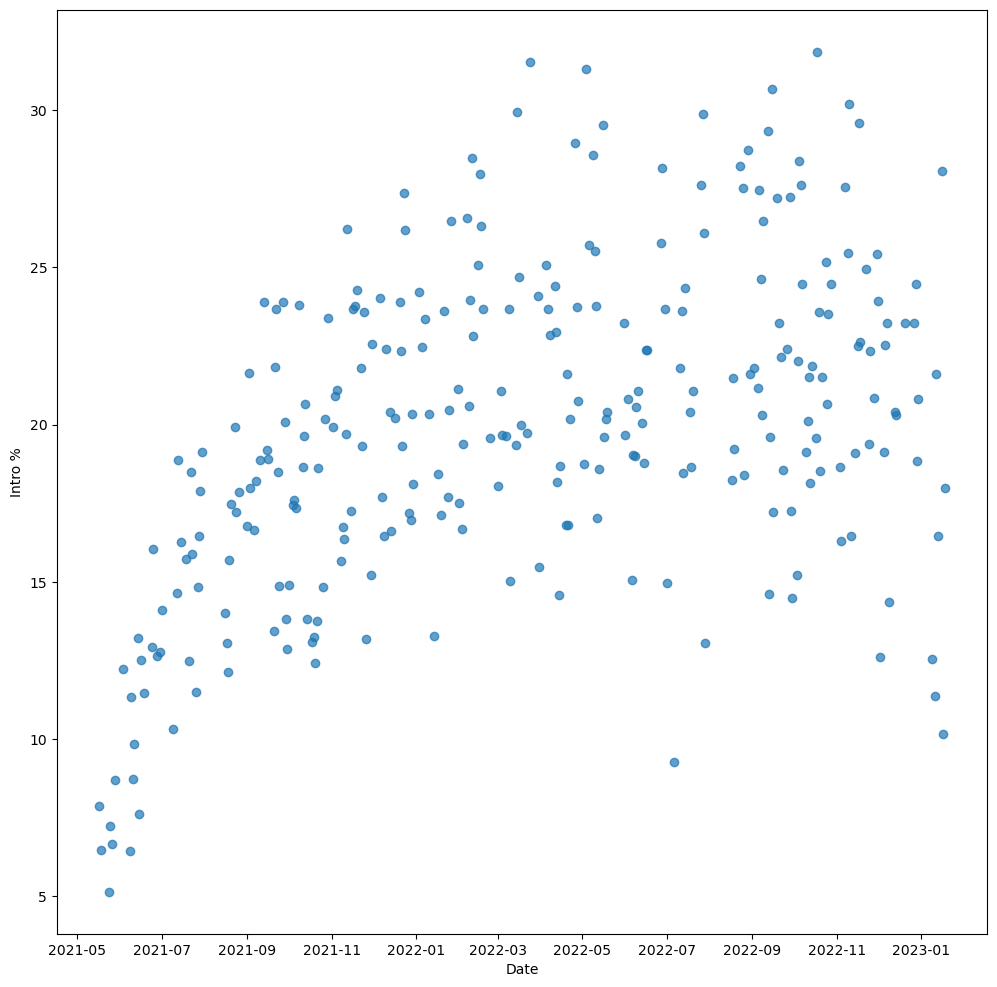

In [4]:
plt.scatter(df["timestamp"], df["ratio"] * 100, alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Intro %")
plt.show()

In [5]:
def exp_fn(x, a, b, c):
    return a * np.exp(-b * x) + c

x = df["timestamp"].apply(lambda x: x.timestamp())
x_norm = (x - x.mean()) / x.std()
y = df["ratio"]
y_norm = (y - y.mean()) / y.std()

popt, pmat = curve_fit(exp_fn, x_norm, y_norm)
popt

array([ 1.05165615e+04, -4.41579400e-05, -1.05165615e+04])

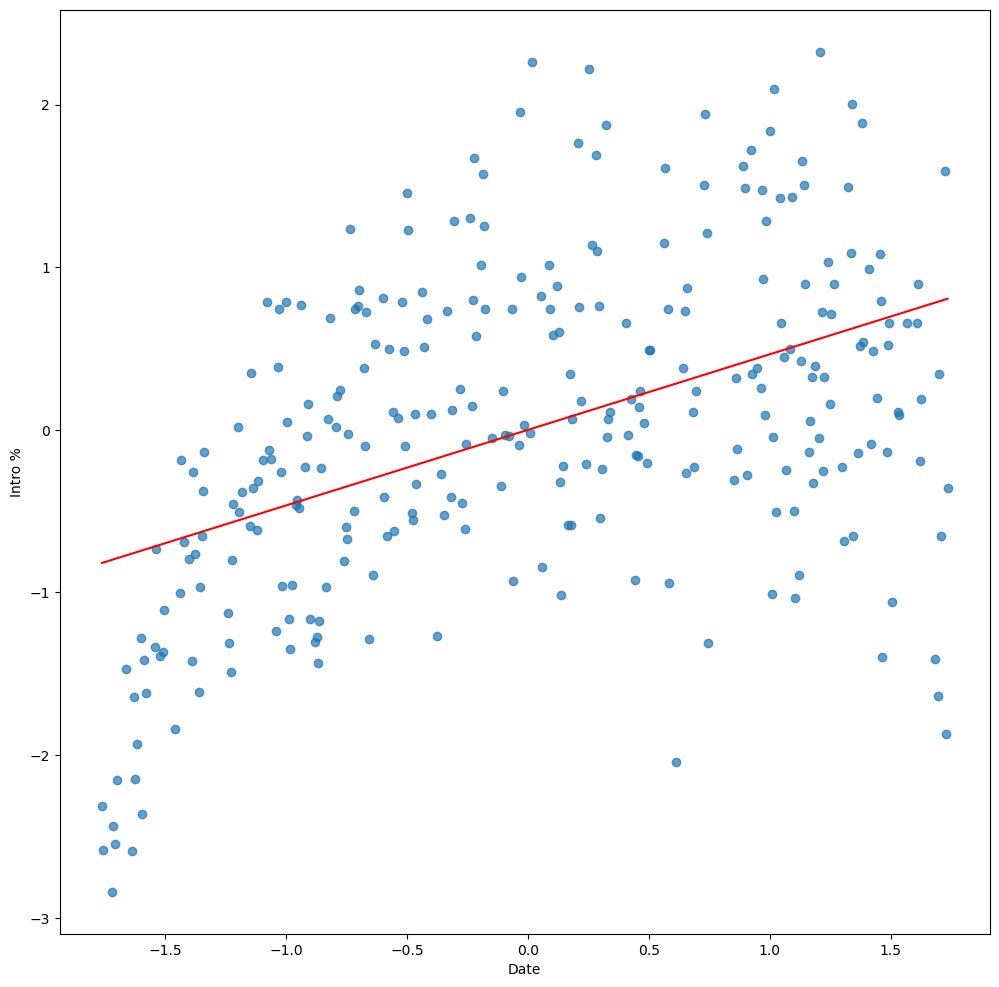

In [6]:
plt.plot(x_norm, exp_fn(x_norm, *popt), 'red')
plt.scatter(x_norm, y_norm, alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Intro %")
plt.show()